# Random Forest_class_sudhanshu 
Practical implementation on multi-Classification problem </br>
Topics Covered:
- Random Forest
- Bagging Classifier

###  Importing required libraries

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Wine-Quality-Dataset/master/winequality-red.csv",sep = ';')

In [4]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Seperate dependent and independent features

In [13]:
x = df.iloc[:,:-1]
y = df['quality']

In [14]:
from sklearn.ensemble import BaggingClassifier

### Train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x , y , random_state=0 )
## If you dont mention the test size by default it will split into 75:20 ratio

In [16]:
x_train.shape,y_train.shape

((1199, 11), (1199,))

In [17]:
x_test.shape,y_test.shape

((400, 11), (400,))

### Bagging Classifier
- we are creating one bag and inside which we are creating many models
- When we are creating any model in bagging, our base model can be anything
- After that there can be multiple decision makers and that decision makers can give me decision

- Here below we are making Bagging classifier using decision tree

In [18]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)

- `n_estimators :` no of models we are creating inside bag

In [19]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

![](https://i.imgur.com/yHdjJHW.jpg)

In [20]:
bag_dt.predict(x_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 5, 7, 7, 5, 5, 4, 6, 5,
       6, 7, 5, 5, 5, 6, 5, 6, 6, 6, 6, 5, 7, 7, 5, 5, 6, 6, 5, 7, 6, 7,
       5, 5, 5, 6, 5, 6, 5, 5, 6, 6, 7, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 7, 5, 7, 6, 6, 5, 5, 5, 7, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 5, 7, 6, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 6, 5, 5, 6, 7, 5, 6,
       6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 7, 6, 5, 7, 4, 6,
       6, 7, 7, 5, 5, 7, 5, 6, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6,
       6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 5, 6, 5, 7, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 7, 6, 7, 6, 6, 7, 5, 7, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6,

In [21]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [22]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [23]:
bag_dt.estimator_params

()

In [24]:
from sklearn.neighbors import KNeighborsClassifier

- Bagging classifier using KNeightborsClassifier (KNN)

In [25]:
# Inside baggineclassifier we can build a model where multiple KNN model can make a decision, so it is also possible 
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

# n_estimators = 10 Total number of KNN classifiers to use

In [26]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

![](https://i.imgur.com/pXu8XxB.jpg)

In [27]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 6, 7, 6, 6, 5, 6, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 7, 6, 6, 6, 6, 7, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 6, 5, 6, 5, 6, 6, 5, 6, 7, 5, 5, 5, 6, 7, 5, 5, 6, 6, 5, 6, 5,
       5, 7, 7, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 4, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 6, 3, 5, 7, 7, 6, 5, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 7, 5, 6, 5, 5, 6, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 5,
       7, 7, 6, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 7, 5, 7, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7, 5, 6, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 7,

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
for i in len(df.columns):
    sns.boxplot(df[dfcolumns[i]])

TypeError: 'int' object is not iterable

<AxesSubplot:>

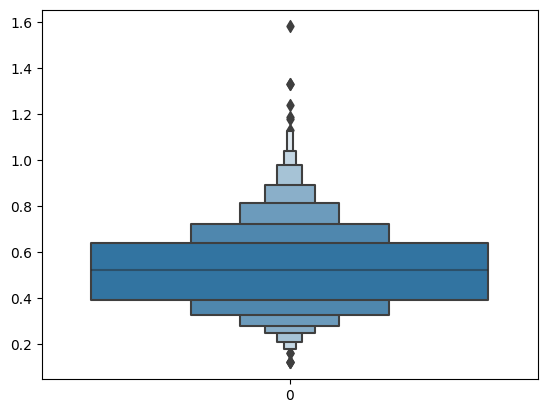

In [13]:
sns.boxenplot(df['volatile acidity'])